### Importing Libraries

In [11]:
import numpy as np
from matplotlib import pyplot as plt
from sklearn import datasets
from sklearn.cluster import KMeans

### Load Digits dataset

In [15]:
digits = datasets.load_digits()
digits

{'data': array([[ 0.,  0.,  5., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ..., 10.,  0.,  0.],
        [ 0.,  0.,  0., ..., 16.,  9.,  0.],
        ...,
        [ 0.,  0.,  1., ...,  6.,  0.,  0.],
        [ 0.,  0.,  2., ..., 12.,  0.,  0.],
        [ 0.,  0., 10., ..., 12.,  1.,  0.]]),
 'target': array([0, 1, 2, ..., 8, 9, 8]),
 'frame': None,
 'feature_names': ['pixel_0_0',
  'pixel_0_1',
  'pixel_0_2',
  'pixel_0_3',
  'pixel_0_4',
  'pixel_0_5',
  'pixel_0_6',
  'pixel_0_7',
  'pixel_1_0',
  'pixel_1_1',
  'pixel_1_2',
  'pixel_1_3',
  'pixel_1_4',
  'pixel_1_5',
  'pixel_1_6',
  'pixel_1_7',
  'pixel_2_0',
  'pixel_2_1',
  'pixel_2_2',
  'pixel_2_3',
  'pixel_2_4',
  'pixel_2_5',
  'pixel_2_6',
  'pixel_2_7',
  'pixel_3_0',
  'pixel_3_1',
  'pixel_3_2',
  'pixel_3_3',
  'pixel_3_4',
  'pixel_3_5',
  'pixel_3_6',
  'pixel_3_7',
  'pixel_4_0',
  'pixel_4_1',
  'pixel_4_2',
  'pixel_4_3',
  'pixel_4_4',
  'pixel_4_5',
  'pixel_4_6',
  'pixel_4_7',
  'pixel_5_0',
  'pixel_5_1',
 

In [16]:
# Viewing data description
digits.DESCR

".. _digits_dataset:\n\nOptical recognition of handwritten digits dataset\n--------------------------------------------------\n\n**Data Set Characteristics:**\n\n    :Number of Instances: 1797\n    :Number of Attributes: 64\n    :Attribute Information: 8x8 image of integer pixels in the range 0..16.\n    :Missing Attribute Values: None\n    :Creator: E. Alpaydin (alpaydin '@' boun.edu.tr)\n    :Date: July; 1998\n\nThis is a copy of the test set of the UCI ML hand-written digits datasets\nhttps://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits\n\nThe data set contains images of hand-written digits: 10 classes where\neach class refers to a digit.\n\nPreprocessing programs made available by NIST were used to extract\nnormalized bitmaps of handwritten digits from a preprinted form. From a\ntotal of 43 people, 30 contributed to the training set and different 13\nto the test set. 32x32 bitmaps are divided into nonoverlapping blocks of\n4x4 and the number of on pixel

In [17]:
# Viewing the digits data
digits.data

array([[ 0.,  0.,  5., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ..., 10.,  0.,  0.],
       [ 0.,  0.,  0., ..., 16.,  9.,  0.],
       ...,
       [ 0.,  0.,  1., ...,  6.,  0.,  0.],
       [ 0.,  0.,  2., ..., 12.,  0.,  0.],
       [ 0.,  0., 10., ..., 12.,  1.,  0.]])

In [18]:
# Viewing the targrt values in digits
digits.target

array([0, 1, 2, ..., 8, 9, 8])

### Visualize the data images

<Figure size 432x288 with 0 Axes>

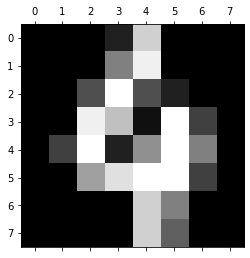

<Figure size 432x288 with 0 Axes>

In [3]:
# Viewing one image from digits dataset
plt.gray()
plt.matshow(digits.images[100])
plt.show()
plt.clf()

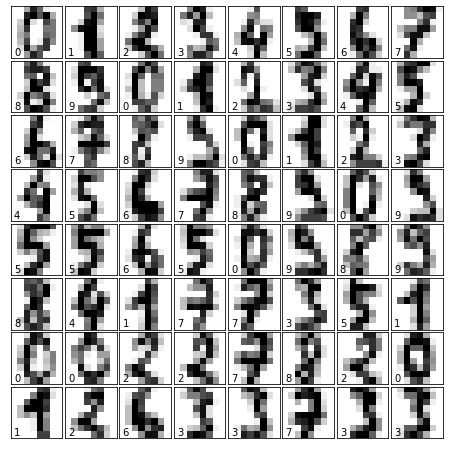

In [5]:
# Viewing all images in digits data
fig = plt.figure(figsize=(6, 6))
# Adjust the subplots 
fig.subplots_adjust(left=0, right=1, bottom=0, top=1, hspace=0.05, wspace=0.05)
# For each of the 64 images
for i in range(64):
    # Initialize the subplots: add a subplot in the grid of 8 by 8, at the i+1-th position
    ax = fig.add_subplot(8, 8, i+1, xticks=[], yticks=[])
    # Display an image at the i-th position
    ax.imshow(digits.images[i], cmap=plt.cm.binary, interpolation='nearest')
    # Label the image with the target value
    ax.text(0, 7, str(digits.target[i]))
plt.show()

### K-Means Clustering Model

In [9]:
# Initialize KMeans and train model on digits data
model = KMeans(n_clusters = 10, random_state = 42)
model.fit(digits.data)

KMeans(n_clusters=10, random_state=42)

### Visualizing centroids

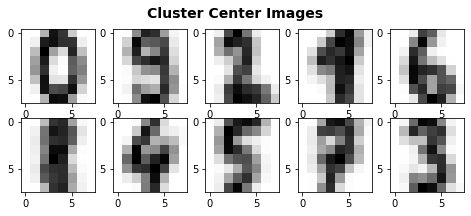

In [10]:
fig = plt.figure(figsize = (8, 3))
fig.suptitle('Cluster Center Images', fontsize = 14, fontweight = 'bold')

for i in range(10):
  # Initialize subplots in a grid of 2X5, at i+1th position
  ax = fig.add_subplot(2, 5, 1 + i)
  # Display images
  ax.imshow(model.cluster_centers_[i].reshape((8, 8)), cmap=plt.cm.binary)
plt.show()

### Testing Model on new data

In [7]:
new_samples = np.array([
[0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.68,4.49,4.57,4.57,2.57,0.00,0.00,0.00,1.14,6.02,6.09,6.77,7.55,0.76,0.00,0.00,0.00,0.00,0.00,1.74,7.62,2.28,0.00,0.00,0.00,0.00,0.00,1.52,7.62,2.28,0.00,0.00,0.00,0.00,0.30,5.09,7.62,1.29,0.00,2.73,7.62,7.55,7.46,7.62,7.23,5.33,1.90,1.21,4.57,4.57,4.95,5.33,5.33,5.33,1.90],
[0.00,0.74,4.79,5.33,3.48,0.00,0.00,0.00,0.00,5.62,7.54,6.46,7.46,0.00,0.00,0.00,0.00,6.85,4.71,3.04,7.62,0.68,0.00,0.00,0.00,6.85,5.39,6.23,7.62,0.76,0.00,0.00,0.00,4.92,7.61,7.61,7.62,0.91,0.00,0.00,0.00,0.07,1.44,3.04,7.62,2.28,0.00,0.00,0.00,0.00,0.00,1.52,7.62,2.28,0.00,0.00,0.00,0.00,0.00,0.61,5.87,1.14,0.00,0.00],
[0.00,5.08,7.62,7.62,7.07,1.97,0.00,0.00,1.74,7.62,4.03,2.04,7.61,4.57,0.00,0.00,3.04,7.62,0.83,0.00,7.08,4.57,0.00,0.00,2.74,7.62,2.65,1.44,7.62,4.49,0.00,0.00,0.22,6.29,7.62,7.23,7.62,3.81,0.00,0.00,0.00,0.45,3.34,4.72,7.62,2.74,0.00,0.00,0.00,0.00,0.00,2.89,7.62,1.21,0.00,0.00,0.00,0.00,0.00,3.80,7.62,0.00,0.00,0.00],
[0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,3.50,5.87,3.65,2.89,0.08,0.00,0.00,0.00,2.43,5.86,7.61,7.62,1.29,0.00,0.00,0.00,0.00,0.00,4.71,7.08,0.07,0.00,0.00,0.00,0.99,3.05,6.77,6.92,4.57,1.52,0.00,0.00,4.72,7.62,7.61,7.23,6.33,2.28,0.00,0.00,0.23,1.21,7.62,3.12,0.00,0.00,0.00,0.00,0.00,0.76,7.62,3.04,0.00,0.00,0.00]
])

In [8]:
new_labels = model.predict(new_samples)
for i in range(len(new_labels)):
    if new_labels[i] == 0:
        print(0, end='')
    elif new_labels[i] == 1:
        print(9, end='')
    elif new_labels[i] == 2:
        print(2, end='')
    elif new_labels[i] == 3:
        print(1, end='')
    elif new_labels[i] == 4:
        print(6, end='')
    elif new_labels[i] == 5:
        print(8, end='')
    elif new_labels[i] == 6:
        print(4, end='')
    elif new_labels[i] == 7:
        print(5, end='')
    elif new_labels[i] == 8:
        print(7, end='')
    elif new_labels[i] == 9:
        print(3, end='')

9578